In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [12]:
# Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Convert pixel values to floats and normalize them
train_images_normalized = train_images.astype('float32') / 255.0
test_images_normalized = test_images.astype('float32') / 255.0

train_images_reshaped = train_images_normalized.reshape((train_images_normalized.shape[0], -1))
test_images_reshaped = test_images_normalized.reshape((test_images_normalized.shape[0], -1))

# Normalize pixel values
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_reshaped)
test_images_scaled = scaler.transform(test_images_reshaped)

# Split the dataset into training (80%) and testing (20%) sets
train_images_split, val_images_split, train_labels_split, val_labels_split = train_test_split(
    train_images_scaled, train_labels, test_size=0.2, random_state=42)

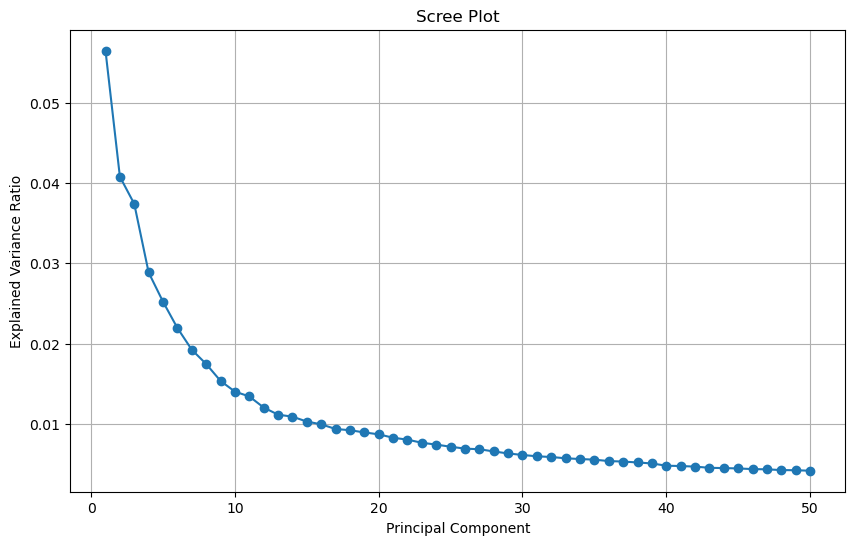

In [13]:
# Define the number of principal components
num_components = 50

# Create a PCA object with 50 components and fit it to the training data
pca = PCA(n_components=num_components)
train_images_reduced = pca.fit_transform(train_images_scaled)
test_images_reduced = pca.transform(test_images_scaled)
# Fit PCA with the selected number of components
pca = PCA(n_components=50)
pca.fit(train_images_scaled)

# Calculate cumulative explained variance ratio
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [14]:
# Create a Logistic Regression classifier
logreg_original = LogisticRegression(max_iter=1000)
logreg_pca = LogisticRegression(max_iter=1000)

# Train the classifier using the original training data (without dimensionality reduction)
logreg_original.fit(train_images_reshaped, train_labels)

# Train the classifier using the PCA-reduced training data
logreg_pca.fit(train_images_reduced, train_labels)

# Make predictions on the original testing data
predictions_original = logreg_original.predict(test_images_reshaped)

In [15]:
# Define the number of PCA components
num_pca_components = 50  # Adjust this based on your PCA results

# Create the neural network model
def create_model(num_hidden_layers=1, num_neurons=128, learning_rate=0.001, activation='relu'):
    model = Sequential()
    model.add(Dense(num_neurons, activation=activation, input_shape=(num_pca_components,)))
    for _ in range(num_hidden_layers):
        model.add(Dense(num_neurons, activation=activation))
    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the model with different hyperparameters
model = create_model(num_hidden_layers=2, num_neurons=256, learning_rate=0.01, activation='relu')
model.summary()

# Train the model using PCA-reduced training data
history = model.fit(train_images_reduced, train_labels, epochs=10, batch_size=32, validation_data=(test_images_reduced, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images_reduced, test_labels)
print(f'Test accuracy: {test_accuracy}')

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 256)                 │          13,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 147,210 (575.04 KB)

 Trainable params: 147,210 (575.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8580 - loss: 0.5545 - val_accuracy: 0.9199 - val_loss: 0.3665
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9282 - loss: 0.3006 - val_accuracy: 0.9379 - val_loss: 0.3024
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9333 - loss: 0.3115 - val_accuracy: 0.9400 - val_loss: 0.3592
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9378 - loss: 0.2816 - val_accuracy: 0.9502 - val_loss: 0.2229
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9379 - loss: 0.2772 - val_accuracy: 0.9356 - val_loss: 0.3527
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9358 - loss: 0.3216 - val_accuracy: 0.9269 - val_loss: 0.3854
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9350 - loss: 0.3322 - val_accuracy: 0.9385 - val_loss: 0.2824
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9406 - loss: 0.3111 -

In [16]:
# Assuming 'model' is your trained neural network model
test_loss, test_accuracy = model.evaluate(test_images_reduced, test_labels)
print(f'Test accuracy: {test_accuracy}')

# Assuming 'model' is your trained neural network model
predictions = model.predict(test_images_reduced)
predicted_labels = tf.argmax(predictions, axis=1)

# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted_labels, test_labels), tf.float32))
print(f'Test accuracy: {accuracy.numpy()}')

# Calculate precision
precision = tf.keras.metrics.Precision()(test_labels, predicted_labels)
print(f'Test precision: {precision.numpy()}')

# Assuming 'logreg_pca' is your trained Logistic Regression model
# Evaluate the Logistic Regression classifier on the PCA-reduced test data
accuracy_logreg_pca = logreg_pca.score(test_images_reduced, test_labels)
print(f'Logistic Regression accuracy on PCA-reduced data: {accuracy_logreg_pca}')

# Compare with the neural network model's accuracy
print(f'Neural Network accuracy on PCA-reduced data: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9327 - loss: 0.5524
Test accuracy: 0.9405999779701233
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Test accuracy: 0.9405999779701233
Test precision: 0.9967899322509766
Logistic Regression accuracy on PCA-reduced data: 0.905
Neural Network accuracy on PCA-reduced data: 0.9405999779701233
